In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

In [2]:
desktop = pd.read_csv('See Desktop - See Mobile.csv')
mobile = pd.read_csv('See Mobile - See Desktop.csv')

MannwhitneyuResult(statistic=33.0, pvalue=0.506004590937926)


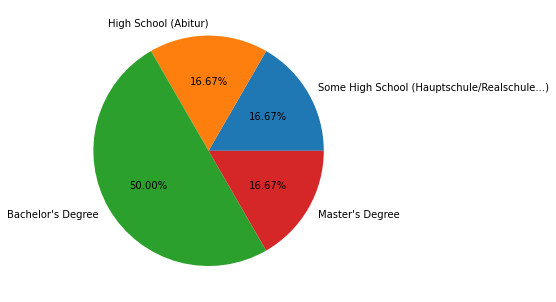

In [3]:
# Degree
# Translate degrees into numbers for U-test 
# Some High School (Hauptschule/Realschule...) == 1
# High School (Abitur) == 2
# Bachelor's Degree == 3
# Master's Degree == 4
degreesDesktop = [3, 2, 3, 3, 2, 1, 4, 2, 3]
degreesMobile = [1, 4, 3, 4, 3, 3, 3, 3, 1]
print(mannwhitneyu(degreesDesktop, degreesMobile))

label = ['Some High School (Hauptschule/Realschule...)', 'High School (Abitur)', 'Bachelor\'s Degree', 'Master\'s Degree']
count = [3, 3, 9, 3]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(count, labels = label,autopct='%1.2f%%')
plt.savefig('Evaluation\img\degree.png', dpi=300)
plt.show()

In [4]:
# SEE Experience 
# 0 = no experience, 1 = experience with SEE
# Same order as the survey took place

mannwhitneyu([0,0,1,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0])

MannwhitneyuResult(statistic=27.0, pvalue=0.13956796660680088)

In [5]:
# Software Development Experinence 
# 0 = no experience, 1 = experience with SD
# Same order as the survey took place

mannwhitneyu([1,1,1,1,0,0,1,0,1], [0,0,0,0,1,1,1,1,0])

MannwhitneyuResult(statistic=49.5, pvalue=0.38389899751303225)

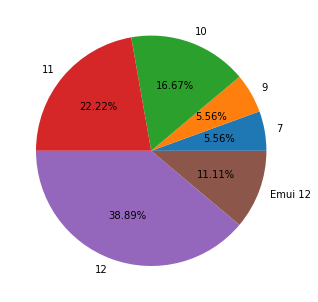

MannwhitneyuResult(statistic=39.0, pvalue=0.9269153068128536)

In [6]:
#Android version
label = ['7', '9', '10', '11', '12', 'Emui 12']
count = [1, 1, 3, 4, 7, 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(count, labels = label,autopct='%1.2f%%')
plt.savefig('Evaluation\img\droid_version.png', dpi=300)
plt.show()

# A7=1, A9=2, A10=3, A11=4, A12=5, Emui=6
mannwhitneyu([4,6,2,5,5,1,5,5,3], [5,4,3,6,5,4,4,5,3])

In [25]:
# Time - U-Tests:

print("Task 1:" ,mannwhitneyu(desktop["Time1"], mobile["Time1"], alternative="less"))
print("Task 2:" ,mannwhitneyu(desktop["Time2"], mobile["Time2"], alternative="less"))
print("Task 3:" ,mannwhitneyu(mobile["Time3"], desktop["Time3"], alternative="less"))
print("Task 4:" ,mannwhitneyu(mobile["Time4"], desktop["Time4"],  alternative="less"))

# U-Tests on comparable tasks:

print("Task 1 & 3:" ,mannwhitneyu(desktop["Time1"], mobile["Time3"]))
print("Task 2 & 4:" ,mannwhitneyu(desktop["Time2"], mobile["Time4"]))
print("Task 3 & 1:" ,mannwhitneyu(desktop["Time3"], mobile["Time1"]))
print("Task 4 & 2:" ,mannwhitneyu(desktop["Time4"], mobile["Time2"]))

# Time average:

print("Average time Task 1 Desktop: ", desktop["Time1"].mean(), "Mobile: ", mobile["Time1"].mean())
print("Average time Task 2 Desktop: ", desktop["Time2"].mean(), "Mobile: ", mobile["Time2"].mean())
print("Average time Task 3 Desktop: ", mobile["Time3"].mean(), "Mobile: ", desktop["Time3"].mean())
print("Average time Task 4 Desktop: ", mobile["Time4"].mean(), "Mobile: ", desktop["Time4"].mean())

# Time median:

print("Median time Task 1 Desktop: ", desktop["Time1"].median(), "Mobile: ", mobile["Time1"].median())
print("Median time Task 2 Desktop: ", desktop["Time2"].median(), "Mobile: ", mobile["Time2"].median())
print("Median time Task 3 Desktop: ", mobile["Time3"].median(), "Mobile: ", desktop["Time3"].median())
print("Median time Task 4 Desktop: ", mobile["Time4"].median(), "Mobile: ", desktop["Time4"].median())



Task 1: MannwhitneyuResult(statistic=19.0, pvalue=0.031571407177032926)
Task 2: MannwhitneyuResult(statistic=24.0, pvalue=0.07853034034056054)
Task 3: MannwhitneyuResult(statistic=12.0, pvalue=0.006685401185413613)
Task 4: MannwhitneyuResult(statistic=17.5, pvalue=0.023415551024855135)
Average time Task 1 Desktop:  79.77777777777777 Mobile:  165.66666666666666
Average time Task 2 Desktop:  47.44444444444444 Mobile:  73.77777777777777
Average time Task 3 Desktop:  81.55555555555556 Mobile:  247.11111111111111
Average time Task 4 Desktop:  66.77777777777777 Mobile:  112.66666666666667
Median time Task 1 Desktop:  47.0 Mobile:  150.0
Median time Task 2 Desktop:  57.0 Mobile:  67.0
Median time Task 3 Desktop:  77.0 Mobile:  151.0
Median time Task 4 Desktop:  46.0 Mobile:  111.0
Task 1 & 3: MannwhitneyuResult(statistic=26.5, pvalue=0.23056548404294974)
Task 2 & 4: MannwhitneyuResult(statistic=35.5, pvalue=0.6907994271193798)
Task 3 & 1: MannwhitneyuResult(statistic=49.0, pvalue=0.4799286921

Task 1: MannwhitneyuResult(statistic=43.0, pvalue=0.859819205054158)


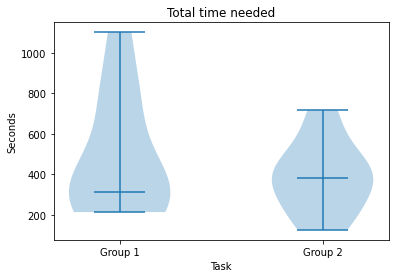

Average time Task 1 group 1:  487.0 Group 2:  387.77777777777777
Median time Task 1 group 1:  315.0 Group 2:  384.0


In [27]:
# The time each group needed independent from the devices 
timeGroup1 = desktop["Time1"] + desktop["Time2"] + desktop["Time3"] + desktop["Time4"]
timeGroup2 = mobile["Time1"] + mobile["Time2"] + mobile["Time3"] + mobile["Time4"] 

print("Task 1:" ,mannwhitneyu(timeGroup1, timeGroup2))

data = [timeGroup1, timeGroup2]
# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot(data, showmedians=True)

ax.set(xticks=np.arange(1, 3), xlabel="Task", ylabel="Seconds")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Group 1'
labels[1] = 'Group 2'
ax.set_xticklabels(labels)
# Add title
ax.set_title('Total time needed')
plt.savefig('Evaluation\img\group_time_violin.png', dpi=300)
plt.show()

print("Average time Task 1 group 1: ", timeGroup1.mean(), "Group 2: ", timeGroup2.mean())
print("Median time Task 1 group 1: ", timeGroup1.median(), "Group 2: ", timeGroup2.median())

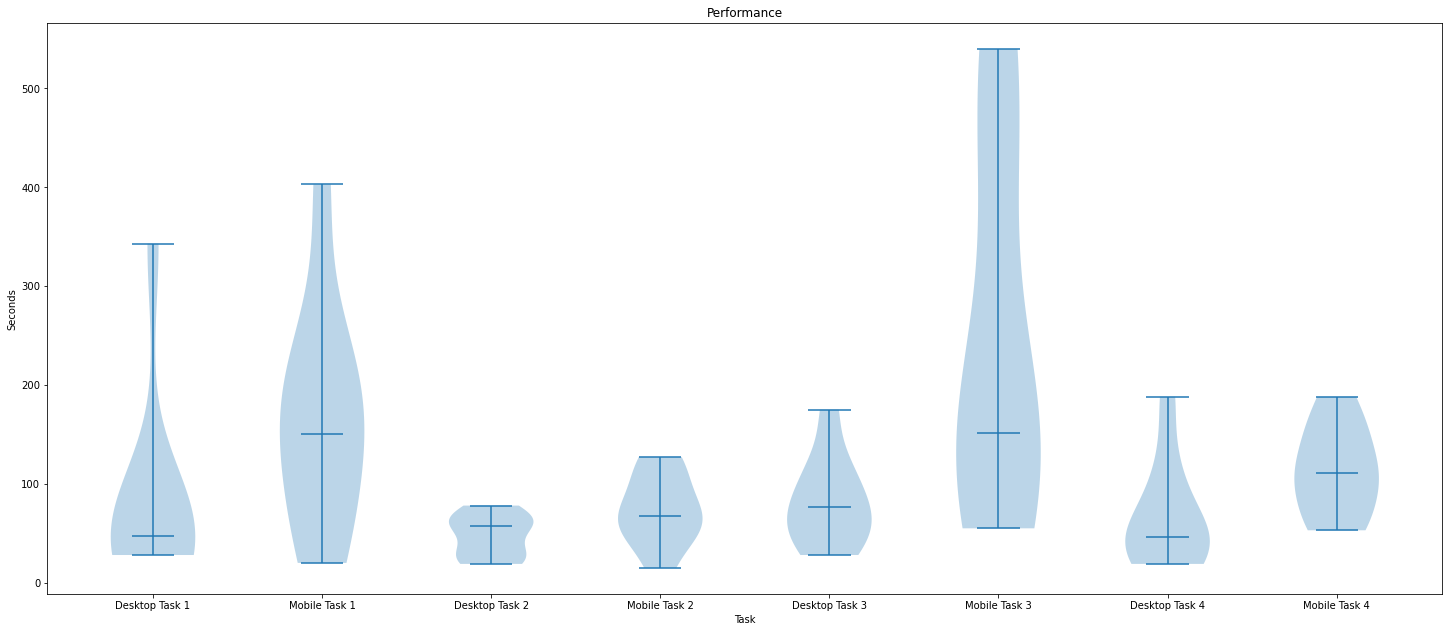

In [9]:
# All 4 tasks on both devices
data = [desktop["Time1"], mobile["Time1"], desktop["Time2"], mobile["Time2"], mobile["Time3"], desktop["Time3"], mobile["Time4"], desktop["Time4"]]
# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot(data, showmedians=True)

ax.set(xticks=np.arange(1, 9), xlabel="Task", ylabel="Seconds")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Desktop Task 1'
labels[1] = 'Mobile Task 1'
labels[2] = 'Desktop Task 2'
labels[3] = 'Mobile Task 2'
labels[4] = 'Desktop Task 3'
labels[5] = 'Mobile Task 3'
labels[6] = 'Desktop Task 4'
labels[7] = 'Mobile Task 4'
ax.set_xticklabels(labels)
# Add title
ax.set_title('Performance')
fig.set_size_inches(25, 10.5)
plt.savefig('Evaluation\img\speed1_violin.png', dpi=300)
plt.show()

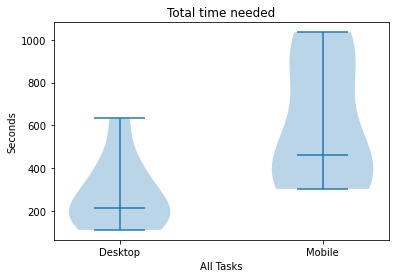

MannwhitneyuResult(statistic=11.0, pvalue=0.005222135550685113)

In [30]:
# Time needed for all tasks
totalTimeDesktop = desktop["Time1"] + desktop["Time2"] + mobile["Time3"] + mobile["Time4"]
totalTimeMobile = desktop["Time3"] + desktop["Time4"] + mobile["Time1"] + mobile["Time2"]

# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot([totalTimeDesktop, totalTimeMobile], showmedians=True)

ax.set(xticks=np.arange(1, 3), xlabel="All Tasks", ylabel="Seconds")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Desktop'
labels[1] = 'Mobile'
ax.set_xticklabels(labels)
# Add title
ax.set_title('Total time needed')
plt.savefig('Evaluation\img\device_time_violin.png', dpi=300)
plt.show()

mannwhitneyu(totalTimeDesktop, totalTimeMobile, alternative="less")

In [13]:
def calcSUS(df):
    dfSUS1 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","SUS21","SUS22","SUS23","SUS24","SUS25","SUS26","SUS27","SUS28","SUS29","SUS210","Improvements2"])
    dfSUS2 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","SUS11","SUS12","SUS13","SUS14","SUS15","SUS16","SUS17","SUS18","SUS19","SUS110","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","Improvements2"])
    scoresD1 = []
    scoresD2 = []
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS1.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD1.append(score)
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS2.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD2.append(score)
    return scoresD1, scoresD2
    
    

In [14]:
susDesktop = calcSUS(desktop)[0] + calcSUS(mobile)[1]
susMobile =  calcSUS(desktop)[1] + calcSUS(mobile)[0]
print("SUS Desktop:")
print(susDesktop)
print("Desktop average:")
print(np.average(susDesktop))
print("SUS Mobile:")
print(susMobile)
print("Mobile average:")
print(np.average(susMobile))
print(mannwhitneyu(susDesktop, susMobile, alternative="greater"))

SUS Desktop:
[60.0, 57.5, 80.0, 60.0, 77.5, 70.0, 85.0, 52.5, 80.0, 87.5, 80.0, 50.0, 62.5, 85.0, 50.0, 92.5, 100.0, 85.0]
Desktop average:
73.05555555555556
SUS Mobile:
[37.5, 52.5, 82.5, 52.5, 52.5, 30.0, 87.5, 35.0, 42.5, 85.0, 47.5, 47.5, 55.0, 90.0, 50.0, 87.5, 97.5, 57.5]
Mobile average:
60.55555555555556
MannwhitneyuResult(statistic=219.5, pvalue=0.03534407182921599)


Desktop median: 78.75
Mobile median: 52.5


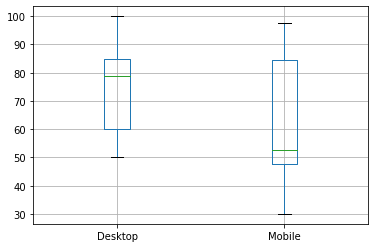

In [15]:
df = pd.DataFrame({"Desktop": susDesktop, "Mobile": susMobile})
print("Desktop median:", df["Desktop"].median())
print("Mobile median:", df["Mobile"].median())
boxplot = df.boxplot(column=['Desktop', 'Mobile'])  

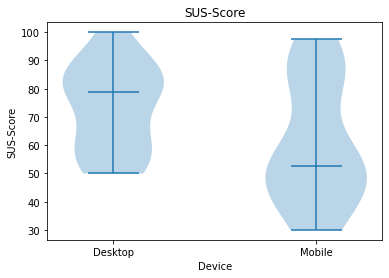

In [16]:


data = [df["Desktop"], df["Mobile"]]
# Extract Figure and Axes instance
fig, ax = plt.subplots()

# Create a plot
ax.violinplot(data, showmedians=True)

ax.set(xticks=np.arange(1, 3), xlabel="Device", ylabel="SUS-Score")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Desktop'
labels[1] = 'Mobile'
ax.set_xticklabels(labels)
# Add title
ax.set_title('SUS-Score')
plt.savefig('Evaluation\img\SUS-Score_violin.png', dpi=300)
plt.show()

In [17]:
# ASQ U-TEST SAME DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ4' + str(x+1), result)

ASQ11 MannwhitneyuResult(statistic=29.0, pvalue=0.3005453490799965)
ASQ21 MannwhitneyuResult(statistic=43.5, pvalue=0.8141993712926219)
ASQ31 MannwhitneyuResult(statistic=15.5, pvalue=0.027471958616590037)
ASQ41 MannwhitneyuResult(statistic=22.0, pvalue=0.09439879299882575)
ASQ12 MannwhitneyuResult(statistic=30.0, pvalue=0.35658239335387365)
ASQ22 MannwhitneyuResult(statistic=31.5, pvalue=0.4170932470422536)
ASQ32 MannwhitneyuResult(statistic=23.5, pvalue=0.13906291753393626)
ASQ42 MannwhitneyuResult(statistic=27.5, pvalue=0.25076145203601363)
ASQ13 MannwhitneyuResult(statistic=38.5, pvalue=0.8836659809578449)
ASQ23 MannwhitneyuResult(statistic=35.5, pvalue=0.6602815071722536)
ASQ33 MannwhitneyuResult(statistic=24.0, pvalue=0.14464283165032438)
ASQ43 MannwhitneyuResult(statistic=22.0, pvalue=0.0930803679465405)


In [18]:
# ASQ U-TEST DIFFERENT DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ4' + str(x+1), result)

ASQ11 MannwhitneyuResult(statistic=47.0, pvalue=0.574961711993179)
ASQ21 MannwhitneyuResult(statistic=37.5, pvalue=0.8070911851830875)
ASQ31 MannwhitneyuResult(statistic=7.0, pvalue=0.0029352087511973985)
ASQ41 MannwhitneyuResult(statistic=24.5, pvalue=0.15784514179830011)
ASQ12 MannwhitneyuResult(statistic=44.0, pvalue=0.7824685152910666)
ASQ22 MannwhitneyuResult(statistic=37.0, pvalue=0.7779324116598495)
ASQ32 MannwhitneyuResult(statistic=13.5, pvalue=0.017389822427381425)
ASQ42 MannwhitneyuResult(statistic=23.0, pvalue=0.11437947618667621)
ASQ13 MannwhitneyuResult(statistic=39.5, pvalue=0.9612208051396489)
ASQ23 MannwhitneyuResult(statistic=36.0, pvalue=0.696209688930925)
ASQ33 MannwhitneyuResult(statistic=20.5, pvalue=0.07350788385259734)
ASQ43 MannwhitneyuResult(statistic=20.5, pvalue=0.06982261911979498)
